In [0]:
import math
import numpy as np
from numpy.random import multivariate_normal, shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def generate_synthetic_2dpoints(mean, cov, npoints):
    points = multivariate_normal(mean, cov, npoints).T
    return points

In [0]:
# generate random covariance
def rcov(r=9):
    np.random.seed(r)
    x = np.random.uniform(-0.35, 0.35, size = (2, 2))
    x = np.dot(x, x.transpose())
    return x 

In [0]:
# generate synthetic data 
def gen_set1():
    # 2 clusters
    cov1 = [[0.02, 0], [0, 0.15]]
    cov2 = [[0.02, 0], [0, 0.25]]
    
    means = [[-1.00, +1.10], 
             [+0.25, -0.75]]
    cov = [cov1, rcov()]

    npoints = [75, 90]
       
    p1 = generate_synthetic_2dpoints(means[0], cov[0], npoints[0])
    p2 = generate_synthetic_2dpoints(means[1], cov[1], npoints[1])
    pa = np.hstack((p1, p2))
    pa = pa.T
    
    # 3 clusters
    means = [[-0.50, -0.00], 
             [+1.65, -1.50], 
             [+1.50, +0.50]]
    cov = [cov1, rcov(), rcov()]
    npoints = [40, 60, 70]

    p1 = generate_synthetic_2dpoints(means[0], cov[0], npoints[0])
    p2 = generate_synthetic_2dpoints(means[1], cov[1], npoints[1])
    p3 = generate_synthetic_2dpoints(means[2], cov[2], npoints[2])
    pb = np.hstack((p1, p2, p3))
    pb = pb.T

    # 4 clusters
    means = [[+1.70, -1.15], 
             [+2.15, +1.10], 
             [-1.20, +1.50],
             [-1.20, -0.2]]
    cov = [rcov() for i in range(4)]
    npoints = [50, 75, 60, 95]

    p1 = generate_synthetic_2dpoints(means[0], cov[0], npoints[0])
    p2 = generate_synthetic_2dpoints(means[1], cov[1], npoints[1])
    p3 = generate_synthetic_2dpoints(means[2], cov[2], npoints[2])
    p4 = generate_synthetic_2dpoints(means[3], cov[3], npoints[3])
    pc = np.hstack((p1, p2, p3, p4))
    pc = pc.T


    # 5 clusters 
    means = [[-2.1, -1.5], 
             [-2.5, +1.5], 
             [+1.8, -1.6],
             [+2.3, +1.7],
             [+0.1, +0.1]]

    cov = [cov1, rcov(), rcov(), cov2, rcov()]
    npoints = [90, 55, 70, 40, 60]
    p1 = generate_synthetic_2dpoints(means[0], cov[0], npoints[0])
    p2 = generate_synthetic_2dpoints(means[1], cov[1], npoints[1])
    p3 = generate_synthetic_2dpoints(means[2], cov[2], npoints[2])
    p4 = generate_synthetic_2dpoints(means[3], cov[3], npoints[3])
    p5 = generate_synthetic_2dpoints(means[4], cov[4], npoints[4])
    pd = np.hstack((p1, p2, p3, p4, p5))
    pd = pd.T

    return [pa, pb, pc, pd]

In [0]:
# load 4 data sets of 2d points of clusters [2, 3, 4, 5] 
pointset = gen_set1()

samples1, samples2, samples3, samples4 = pointset[0], pointset[1], pointset[2], pointset[3]

In [0]:
#Calculate shortest distance between 2 data points
def Euclidean_distance(one, two):

    squared_distance = 0
    
    for i in range(len(one)):

            squared_distance += ((one[i] - two[i])**2)

    ed = math.sqrt(squared_distance)

    return ed;

In [0]:
def k_means_train(dataset, cluster_number, iteration_number):
  
  #create random centroids
  centroids = np.random.randn(cluster_number, dataset.shape[1])
  
  
  for i in range(iteration_number):
    
      clusters = []
      
      #iterate over the dataset
      for p, point in enumerate(dataset):

          current_distance = 0
          best_distance = 100
          
          for c, center in enumerate(centroids):
          
              current_distance = Euclidean_distance(point, center)
              if (current_distance < best_distance):
                  best_distance = current_distance
                  cluster_index = c
                  
          #put a point with exact cluster number in a list, act_data = [x, y, cluster_index]
          act_data = point
          act_data = np.append(act_data, cluster_index)
          clusters.append(act_data)
          
      #numpy array for plotting datas
      np_clusters = np.asarray(clusters)
      clusters.clear()
      
      act_cluster = []
      
      #iterate over centroids, determine mean of cluster groups and update new place of centroid points
      for c, centroid in enumerate(centroids):
          
          for cl, cluster in enumerate(np_clusters):
              
              if (cluster[2] == c):
                  
                  act_cluster.append(cluster)
          
          np_act_cluster = np.asarray(act_cluster)
          mean = np.mean(np_act_cluster, axis = 0)
          
          centroid[0] = mean[0]
          centroid[1] = mean[1]
          act_cluster.clear()
 
  return np_clusters, centroids
    

In [0]:
def plotting_results(labels, centroids):
      
    #array for plotting cluster groups in different colors
    colors = ['b', 'g', 'c', 'm', 'y', 'k', 'w', 'r']
    
    act_cluster = []
    
    #iterate over centroids to plot cluster groups
    for c, centroid in enumerate(centroids):
          
        for cl, cluster in enumerate(labels):
            
            if (cluster[2] == c):
                  
                act_cluster.append(cluster)
          
        np_act_cluster = np.asarray(act_cluster)
        
        plt.scatter(np_act_cluster[:,0], np_act_cluster[:,1], c=colors[c], s=5)
        
        act_cluster.clear()
     
    #plotting final centroid points
    for z, centroid in enumerate(centroids):
        
        plt.scatter(centroids[z][0], centroids[z][1], marker='*', c='r', s=150)
    
    return None

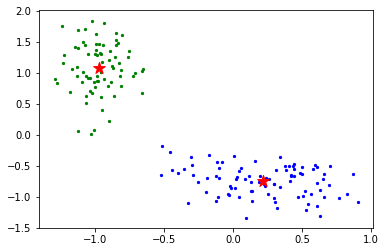

In [106]:
np.random.shuffle(samples1)

labels, centroids = k_means_train(samples1, 2, 100)

plotting_results(labels, centroids)

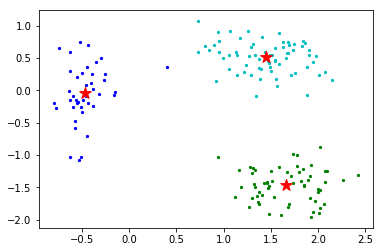

In [107]:
np.random.shuffle(samples2)

labels, centroids = k_means_train(samples2, 3, 100)

plotting_results(labels, centroids)

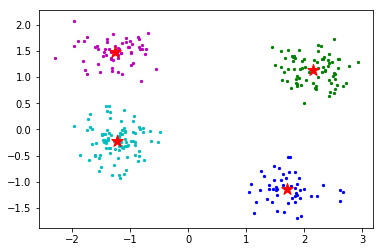

In [108]:
np.random.shuffle(samples3)

labels, centroids = k_means_train(samples3, 4, 100)

plotting_results(labels, centroids)

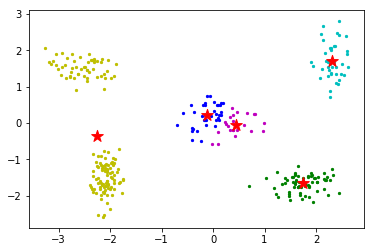

In [109]:
np.random.shuffle(samples4)

labels, centroids = k_means_train(samples4, 5, 100)

plotting_results(labels, centroids)